In [1]:
import os
import numpy as np
import pandas as pd
import math
import random
from tqdm.auto import tqdm

In [66]:
random.seed(1)
np.random.seed(1)

In [69]:
def generate_pair(csv_file, out_file):
    train_df = pd.read_csv(csv_file)
    font_sample = train_df.font_label.value_counts()
    min_combine = min(font_sample)
    n_combine = math.comb(min_combine, 2)
    
    sample_1 = []
    sample_2 = []
    labels = [] # 0: same, 1: diff
    for i in tqdm(font_sample.index):
        fonts = train_df[train_df.font_label == i].path.to_list()

        # choose same
        for x1 in range(min_combine):
            sample_1.extend([fonts[x1]] * len(range(x1 + 1, min_combine)))
            for x2 in range(x1 + 1, min_combine):
                sample_2.append(fonts[-x2])
        labels.extend([0] * n_combine)

        # random diff
        diff_fonts = train_df[train_df != i].path.to_list()
        sample_1.extend(random.choices(fonts, k = n_combine))
        sample_2.extend(random.choices(diff_fonts, k = n_combine))
        labels.extend([1] * n_combine)

    print(len(sample_1), len(sample_2), len(labels))
    df = pd.DataFrame({
        'sample_1': sample_1,
        'sample_2': sample_2,
        'lables': labels
    })

    df.to_csv(out_file, index = False)
    
generate_pair('../data/test_font_all.csv', '../data/test_pair_font_all.csv')

  0%|          | 0/1062 [00:00<?, ?it/s]

140184 140184 140184


In [86]:
def f():
    random.seed(0)
    for i in range(5):
        print(random.randint(1, 10))
        
f(), f()

7
7
1
5
9
7
7
1
5
9


(None, None)

In [4]:
from PIL import Image

In [5]:
import torch.nn as nn
from torch.nn import functional
from torchvision import transforms as T

class CropSize(nn.Module):
    def __init__(self, size):
        super(CropSize, self).__init__()
        self.size = size
    
    def forward(self, image):
        '''
            image: tensor image
        '''
        h, w = image.shape[-2:]
        delta_x = self.size - w
        delta_y = self.size - h
        left = int(delta_x / 2)
        right = delta_x - left
        top = int(delta_y / 2)
        bottom = delta_y - top
        return functional.pad(image, (left, right, top, bottom), mode='replicate')


    def __repr__(self) -> str:
        return f'Padding with width x height: {self.size} x {self.size}'

to_tensor = T.Compose([
    T.ToTensor(),
    CropSize(64),
    T.Normalize(mean=[0.9, 0.9, 0.9], std=[0.1, 0.1, 0.1]),
])

augmenter = T.Compose([
    T.ColorJitter(0.2, 0.1, 0.5, 0.2),
    T.RandomGrayscale(0.2),
    to_tensor
])

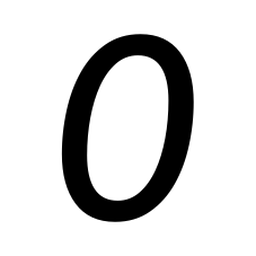

In [9]:
img = Image.open('../../../dataset/explor_all/image/ABeeZee-Italic/00.png').convert('RGB')
img

In [11]:
to_tensor(img).shape

torch.Size([3, 64, 64])